# Análisis de incidentes ocurridos en Seattle (Verano 2014)
---
A choropleth map uses colour coding to indicate quantitative values across geographical areas on a map.

![](https://datavizcatalogue.com/methods/images/anatomy/choropleth.png)


En el Verano 2014 pasado, en Seattle se registraron más de XXXX incidentes los cuales afectaron a muchas personas. El analisis que se realizará estará en función de abordar las siguientes preguntas.

 *  ¿Cómo varían los incidentes según la hora del día? 
 *  ¿Qué incidentes son más comunes por la noche? 
 *  ¿En qué periodos del día son más comunes los robos?
   *  Para cualquiera de las ciudades, 
      *  ¿Cómo varían los incidentes según el vecindario? 
      *  ¿Qué incidencias son más habituales en el centro de la ciudad?
      *  ¿En qué zonas o barrios son más comunes los robos o hurtos?
      *  ¿Cómo varían los incidentes mes a mes en el conjunto de datos del verano de 2014?
      *  ¿Qué tipos de incidentes tienden a correlacionarse entre sí día a día?
 *  ¿Qué podemos inferir en términos generales sobre las diferencias en los patrones delictivos entre Seattle y San Francisco? 
    ¿Una ciudad tiende a tener más criminalidad que la otra, per cápita? ¿Cambian materialmente las frecuencias relativas de los tipos de incidentes entre las dos ciudades? 
   *  Para cualquiera de las ciudades, 
      *  ¿Ciertos delitos se correlacionan con factores ambientales como la temperatura?



## [Plotly](https://plotly.com/)
Plotly is a technical computing company that develops online data analytics and visualization tools. Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.

### [plotly.py](https://plotly.com/python/)
An interactive, open-source, and browser-based graphing library for Python.

```bash
$ pip install plotly
```

>Plotly Express is a new high-level Python visualization library: it's a wrapper for Plotly.py that exposes a simple syntax for complex charts.

### [GeoJSON](https://geojson.org/)
# An open standard format designed for representing simple geographical features, along with their non-spatial attributes.

### [Mapbox](https://mapbox.com/)
An open source mapping platform for custom designed maps.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os
import pandas as pd1
import pandas as pd2
import pandas as pd3
import numpy as np
import seaborn as sns; sns.set()

#mapbox
import json
import plotly.graph_objects as go 
import plotly.express as px
from shapely.geometry import shape

#4
import dash
import dash_html_components as html
import plotly.graph_objects as go
import plotly.express as px
from dash import Dash, dcc, html, Output, Input, State, callback, no_update
import dash_core_components as dcc
import pandas as pd
import geopandas as gpd

#5
import requests


/tmp/ipykernel_1636/3250236384.py:19: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/tmp/ipykernel_1636/3250236384.py:23: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [25]:
#####################SAN FRANCISCO
dfsf2014 = pd1.read_csv('https://raw.githubusercontent.com/frmrv1/dscience_seattle_job/main/sanfrancisco_incidents_summer_2014.csv')
dfsf2014['hour_start'] = pd1.DatetimeIndex(dfsf2014['Time']).hour
dfsf2014['Month'] = pd1.DatetimeIndex(dfsf2014['Date']).month
dfsf2014['Year'] = pd1.DatetimeIndex(dfsf2014['Date']).year

In [31]:
#####################SEATTLE
#dfsea2014. Carga de archivo CSV seattle_incidents_summer_2014.csv
dfsea2014 = pd2.read_csv('https://raw.githubusercontent.com/frmrv1/dscience_seattle_job/main/seattle_incidents_summer_2014.csv',low_memory=False)
#,usecols=['General Offense Number','Offense Type'])
#dfsea2014 = pd2.read_csv('seattle_incidents_summer_2014.csv',low_memory=False) #,usecols=['General Offense Number','Offense Type'])
#Columna Report Number1 para generar merge con format columna Report Number de csv seattle_line_full_data_2014-2015.csv
dfsea2014['Report Number1'] = dfsea2014['General Offense Number'].astype('string').str.slice(start=0, stop=4)+'-'+dfsea2014['General Offense Number'].astype('string').str.slice(start=4)

#hour_start. Extrae hora de columna 'Occurred Date or Date Range Start'
dfsea2014['hour_start'] = pd2.DatetimeIndex(dfsea2014['Occurred Date or Date Range Start']).hour

dfsea2014['date_start'] = pd2.to_datetime(dfsea2014["Occurred Date or Date Range Start"]).dt.date
#ZoneHour: Clasificar hora del dia. Mañana: de 6 a 12, Tarde: de 12 a 19 ,Noche: de 19 a 24 y Madrugada de 24 a 6.
dfsea2014['ZoneHour'] = 'Unknown'
dfsea2014.loc[(dfsea2014['hour_start']>5) & (dfsea2014['hour_start']<12), 'ZoneHour'] = 'tomorrow'
dfsea2014.loc[(dfsea2014['hour_start']>11) & (dfsea2014['hour_start']<19), 'ZoneHour'] = 'late'
dfsea2014.loc[(dfsea2014['hour_start']>18) & (dfsea2014['hour_start']<24), 'ZoneHour'] = 'night'
dfsea2014.loc[(dfsea2014['hour_start']>-1) & (dfsea2014['hour_start']<6), 'ZoneHour'] = 'early morning'
#hour_starthhmm, extrae hora y genera formato hh:mm
dfsea2014['hour_starthhmm'] = pd2.DatetimeIndex(dfsea2014['Occurred Date or Date Range Start']).strftime("%H:00")

#dfsea2014_all. Carga de archivo CSV seattle_line_full_data_2014-2015.csv
dfsea2014_all = pd2.read_csv('https://media.githubusercontent.com/media/frmrv1/dscience_seattle_job/main/seattle_line_full_data_2014-2015.csv',low_memory=False,usecols=\
['Year of Offense Start DateTime','Latitude','Longitude','Report Number','Month of Offense Start DateTime','MCPP',\
 'Offense','Precinct','SeaStat Category ','SeaStat Offense','Neighborho','PCT','PCT Full','Sector','Crime Against Category'])
#Elimina Registros duplicados con key 'Report Number','SeaStat Category ','SeaStat Offense'
dfsea2014_all.drop_duplicates(['Report Number','SeaStat Category ','SeaStat Offense'], inplace=True)
#dfsea2014. Merge entre los dos CSV a traves de columna Report Number 1 y Report Number.
#Se agrega a dfsea2014 columnas de CSV seattle_line_full_data_2014-2015.csv :
dfsea2014=dfsea2014.merge(dfsea2014_all, left_on='Report Number1', right_on='Report Number', how='left')


In [4]:
#Declaraciones Comunes
def formato_hora(x, pos):
    return '{0}:00'.format(int(x))
def formato_numerico(x, pos):
    return "{:,}".format(int(x)).replace(',','~').replace('.',',').replace('~','.')
    #return '{:,}'.format(int(x))
legend_prop_bold = {'weight':'bold'}

In [161]:
by_all_category = dfsea2014.groupby(['SeaStat Category '])['Offense Code'].count()
by_all_category=(by_all_category.reset_index().sort_values(['Offense Code'],ascending=True).set_index(['SeaStat Category ']))

In [162]:
by_all_category.head(100)

Offense Code
SeaStat Category               
Violent Crime              1361
All Other Crime            8357
Property Crime            18520

#### ¿Cómo varían los incidentes según la hora del día? 

In [35]:
#by_hour. Agrupar con pivot_table por hora. cantidad con Offense Code.
by_hour = dfsea2014.pivot_table('Offense Code', aggfunc='count',index='hour_starthhmm')
by_hour.sort_values(["hour_starthhmm"], ascending= [True], inplace=True)

In [106]:
by_hour.head(100)

Offense Code
hour_starthhmm              
00:00                   2103
01:00                   1031
02:00                    865
03:00                    609
04:00                    489
05:00                    403
06:00                    565
07:00                    825
08:00                   1157
09:00                   1186
10:00                   1307
11:00                   1313
12:00                   2084
13:00                   1619
14:00                   1526
15:00                   1763
16:00                   1723
17:00                   1887
18:00                   1889
19:00                   1805
20:00                   1912
21:00                   2018
22:00                   1987
23:00                   1681

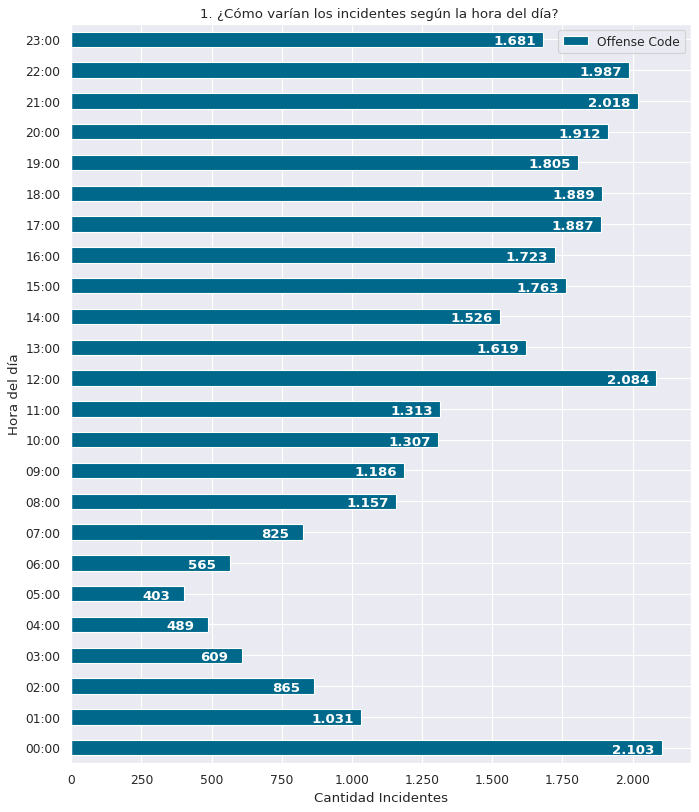

In [7]:
fig, ax = plt.subplots(figsize=(10,12), dpi=80)
ax.xaxis.set_major_formatter(FuncFormatter(formato_numerico))
by_hour.plot.barh(ax=ax,color='#00688B',ylabel='Hora del día',xlabel='Cantidad Incidentes',rot=0,title='1. ¿Cómo varían los incidentes según la hora del día? ')
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    # The height of the bar is the data value and can be used as the label
    label_text = "{:,}".format(int(width)).replace(',','~').replace('.',',').replace('~','.')
    label_x = x + width - 100
    label_y = y + ((height / 2)-0.05)
    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x,label_y,label_text,ha='center',va='center',color='w',fontsize=12,weight='bold')

### ¿Qué incidentes son más comunes por la noche? 

In [108]:
#2.1 ¿Qué incidentes son más comunes por la noche?
list1 =["night","early morning"]
by_night_zonehour=dfsea2014[(dfsea2014['ZoneHour'].isin(list1))]
by_night_zonehour = dfsea2014.groupby(['SeaStat Category ','SeaStat Offense'])['Offense Code'].count()
#by_night_zonehour. Ordenar resultado de forma ascendente por la columna cantidad total
by_night_zonehour=(by_night_zonehour.reset_index().sort_values(['Offense Code'],ascending=True).set_index(['SeaStat Category ','SeaStat Offense']))

In [109]:
by_night_zonehour.head(100)

Offense Code
SeaStat Category  SeaStat Offense                                            
Violent Crime     Rape                                                      1
                  Homicide                                                  2
All Other Crime   Sex Offenses                                              2
                  Pornography/Obscene Material                              3
                  Disorderly Conduct                                       10
                  Nonviolent Family Offenses                               22
                  DUI                                                      35
                  Liquor Law Violations                                    59
                  Prostitution Offenses                                   174
                  Weapon Law Violations                                   197
                  Narcotic Violations                                     362
Violent Crime     Aggravated Assault                                      626
All Other Crime   Trespass                                                637
Violent Crime     Robbery                                                 732
All Other Crime   Extortion/Fraud/Bribery (Includes Bad Checks)          1930
                  Assault Offenses                                       2125
Property Crime    Motor Vehicle Theft                                    2738
All Other Crime   Property Offenses                                      2801
Property Crime    Burglary                                               3600
                  Larceny-Theft                                         12182

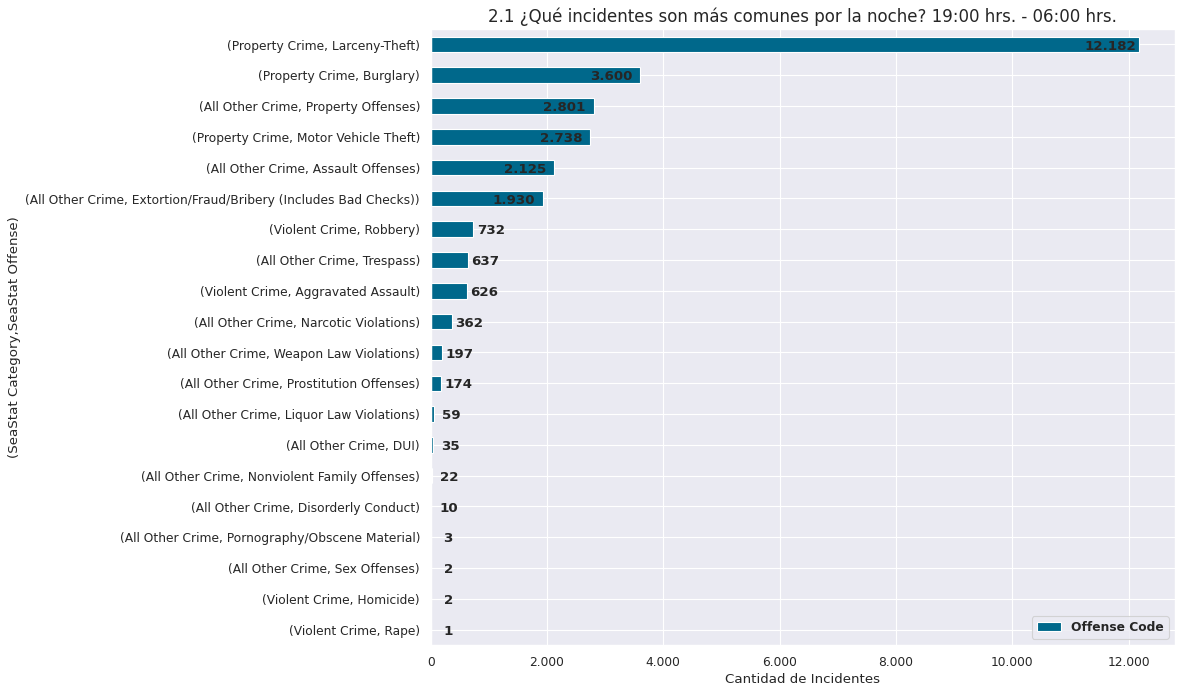

In [110]:
#Genera grafico de barra horizontal
fig, ax = plt.subplots(figsize=(12,10), dpi=80)
by_night_zonehour.plot.barh(ax=ax, legend=True,rot=0,color='#00688B')
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    # The height of the bar is the data value and can be used as the label
    #label_text = f'{width:.0f}'  # f'{height:.2f}' to format decimal values
    label_text = "{:,}".format(int(width)).replace(',','~').replace('.',',').replace('~','.')
    # ax.text(x, y, text)
    if width < 1000: label_x = x + width + 300
    else: label_x = x + width - 500
    
    label_y = y + ((height / 2)-0.05)
    # print('|x'+str(rect.get_x())+'|y'+str(rect.get_y())+'|label:'+label_text)
    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center',fontsize=12,weight='bold')

#Setea titulo del grafico y eje X,Y.
ax.set_title('2.1 ¿Qué incidentes son más comunes por la noche? 19:00 hrs. - 06:00 hrs.',size=15)
ax.set_xlabel('Cantidad de Incidentes',size=12)
ax.set_ylabel('(SeaStat Category,SeaStat Offense)',size=12)
ax.legend(['Offense Code'],loc='lower right',fontsize=12,prop=legend_prop_bold)
ax.xaxis.set_major_formatter(FuncFormatter(formato_numerico))

### ¿En qué periodos del día son más comunes los robos?

In [111]:
#2.2 ¿En qué periodos del día son más comunes los robos?
print('2.2 ¿En qué periodos del día son más comunes los robos?')
list1 =["tomorrow","late"]
by_q2zonehour=dfsea2014[(dfsea2014['ZoneHour'].isin(list1)) & (dfsea2014['SeaStat Offense'].str.contains('Theft'))]
agg_tips = by_q2zonehour.groupby(['hour_starthhmm', 'SeaStat Offense'])['Offense Code'].count().unstack().fillna(0)
agg_tips.head(100)

2.2 ¿En qué periodos del día son más comunes los robos?


SeaStat Offense  Larceny-Theft  Motor Vehicle Theft
hour_starthhmm                                     
06:00                      204                   67
07:00                      228                   71
08:00                      381                   76
09:00                      429                   72
10:00                      442                   82
11:00                      481                   62
12:00                      680                   79
13:00                      575                   84
14:00                      545                   65
15:00                      585                  115
16:00                      675                   97
17:00                      726                  136
18:00                      772                  171

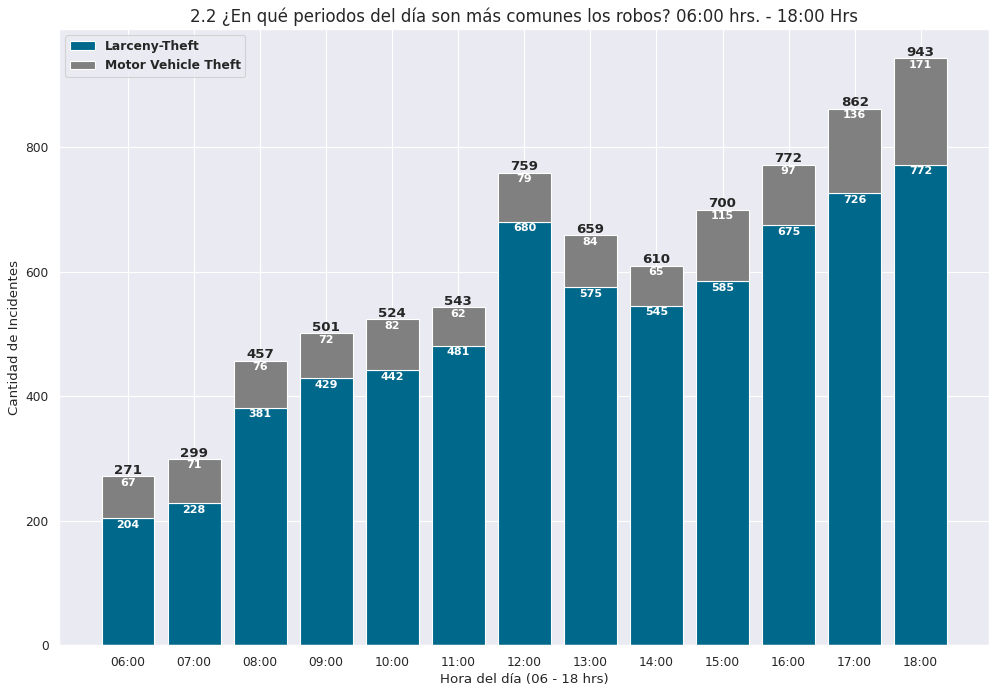

In [45]:
fig, ax = plt.subplots(figsize=(15,10), dpi=80)
colors = ['#00688B', '#808080']
#aki voy revisar paleta de colores 09 11 20232    19.23hrs
bottom = np.zeros(len(agg_tips))
for i, col in enumerate(agg_tips.columns):
    ax.bar(agg_tips.index, agg_tips[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(agg_tips[col])
totals = agg_tips.sum(axis=1)
y_offset = 4
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, round(total), ha='center',
          weight='bold')
# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -15
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
  ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=10
  )

ax.set_title('2.2 ¿En qué periodos del día son más comunes los robos? 06:00 hrs. - 18:00 Hrs',size=15)
ax.set_ylabel('Cantidad de Incidentes',size=12)
ax.set_xlabel('Hora del día (06 - 18 hrs)',size=12)
ax.legend(loc='best',fontsize=12,prop=legend_prop_bold)


### Para cualquiera de las ciudades, ¿cómo varían los incidentes según el vecindario? 

In [112]:
#SEATTLE
########################################################################################
########################################################################################
########################################################################################
#3.1 Para cualquiera de las ciudades, ¿cómo varían los incidentes según el vecindario? 
#print('3.1 Para cualquiera de las ciudades, ¿cómo varían los incidentes según el vecindario?')

dfmcppid = dfsea2014.groupby(['MCPP']).agg({"Report Number1": "count"}).rename(columns={"Report Number1": "count_incidents"}).reset_index()
dfmcppid.head(100)

MCPP  count_incidents
0                    ALASKA JUNCTION              274
1                               ALKI              172
2                      BALLARD NORTH              855
3                      BALLARD SOUTH              884
4                           BELLTOWN              939
5                         BITTERLAKE              637
6                    BRIGHTON/DUNLAP              452
7                       CAPITOL HILL             1973
8           CENTRAL AREA/SQUIRE PARK              588
9   CHINATOWN/INTERNATIONAL DISTRICT              537
10           CLAREMONT/RAINIER VISTA              150
11                     COLUMBIA CITY              139
12               COMMERCIAL DUWAMISH               18
13          COMMERCIAL HARBOR ISLAND                9
14               DOWNTOWN COMMERCIAL             2376
15                   EASTLAKE - EAST               61
16                   EASTLAKE - WEST              225
17                     FAUNTLEROY SW              116
18                        FIRST HILL              672
19                           FREMONT              550
20                           GENESEE              120
21                        GEORGETOWN              286
22                         GREENWOOD              681
23                        HIGH POINT              167
24                     HIGHLAND PARK              308
25                      HILLMAN CITY              105
26    JUDKINS PARK/NORTH BEACON HILL              242
27                          LAKECITY              869
28              LAKEWOOD/SEWARD PARK              221
29                      MADISON PARK              102
30                    MADRONA/LESCHI              386
31                          MAGNOLIA              478
32                   MID BEACON HILL              297
33                       MILLER PARK              180
34              MONTLAKE/PORTAGE BAY              255
35                            MORGAN              159
36                       MOUNT BAKER              389
37                         NEW HOLLY              167
38                     NORTH ADMIRAL              212
39                 NORTH BEACON HILL              490
40                    NORTH DELRIDGE              141
41                         NORTHGATE             1684
42                     PHINNEY RIDGE              237
43                      PIGEON POINT               16
44                    PIONEER SQUARE              566
45                        QUEEN ANNE             1373
46                     RAINIER BEACH              320
47                      RAINIER VIEW              232
48                 ROOSEVELT/RAVENNA             1072
49    ROXHILL/WESTWOOD/ARBOR HEIGHTS              382
50                         SANDPOINT              532
51                       SLU/CASCADE             1221
52                              SODO              375
53                 SOUTH BEACON HILL              119
54                    SOUTH DELRIDGE              120
55                        SOUTH PARK              338
56                        UNIVERSITY             1096
57                           UNKNOWN               39
58                       WALLINGFORD              634

In [19]:
url = 'https://raw.githubusercontent.com/frmrv1/dscience_seattle_job/main/Seattle_MCPP.geojson'
f = requests.get(url)
# The .json() method automatically parses the response into JSON.
geo_json = f.json()

center_pos = {} 
features = geo_json['features'] 
for feature in features: 
	k = feature['properties']['neighborhood'] 
	s = shape(feature["geometry"]) 
	p = s.centroid 
	center_pos[k] = list(p.coords)

fig = go.Figure() 
#Agrega en mapa por cada vecindario el número de incidentes.
for k,v in center_pos.items(): 
	#print(k,v) 
	val = dfmcppid[dfmcppid['MCPP'] == k]['count_incidents'] 
	try: 
		if float(format(val.values[0]))>1200: 
				colour='white'
		else: 
				colour='black'
		val = format(val.values[0]) #+'%'	
	except IndexError: 
		val = '{:1}'.format(1) 
	
	fig.add_trace(go.Scattermapbox( 
		lat=[center_pos[k][0][1]], 
		lon=[center_pos[k][0][0]], 
		mode='text', 
        textfont=dict( 
			color = colour, 
			size=12, 
		), 
		text=val, 
		showlegend=False
))

#Genera Mapa con MapBox con los vecindarios en Seattle y cantidad de incidentes.
fig.add_trace(go.Choroplethmapbox( 
	geojson=geo_json, 
	locations=dfmcppid['MCPP'], 
	featureidkey="properties.neighborhood", 
	z=dfmcppid['count_incidents'], 
    colorscale="Reds", 
    marker_opacity=0.7, 
	marker_line_width=1
)) 
fig.update_layout( 
#	mapbox_accesstoken=mapbox_access_token, 
    mapbox_style="carto-positron", 
	mapbox_zoom=9, 
	mapbox_center = {"lat": 47.60621, "lon": -122.33207} 
  
) 
fig.update_layout(autosize=False, 
    title_x=0.5
    ,title_y=0.95
    ,title_text="4. Para cualquiera de las ciudades, Incidentes segun vecindario en Seattle verano 2014"
    ,margin={"l": 0, "r": 0, "b": 0, "t": 80}
    ,font_size=10
                 )
fig.show()
########################################################################################
########################################################################################
########################################################################################

### ¿Qué incidencias son más habituales en el centro de la ciudad?

In [113]:
#SEATTLE
########################################################################################
########################################################################################
########################################################################################
#3.1 ¿Qué incidencias son más habituales en el centro de la ciudad? 
#print('3.1 ¿Qué incidencias son más habituales en el centro de la ciudad?')
by_neigh2 = dfsea2014[dfsea2014['MCPP']=='DOWNTOWN COMMERCIAL'].pivot_table('Report Number', aggfunc='count',index=['SeaStat Offense'],columns=['MCPP'])
by_category_total = dfsea2014.groupby('SeaStat Category ').agg({"MCPP": "count"}).rename(columns={"MCPP": "count_mcpp"})
by_category_total = by_category_total.reset_index()
by_category_total.head(100)

SeaStat Category   count_mcpp
0   All Other Crime        8357
1    Property Crime       18520
2     Violent Crime        1361

In [47]:
trace_category_total = go.Pie(labels=by_category_total['SeaStat Category '], 
                hoverinfo='label+percent', 
                values=by_category_total['count_mcpp'], 
                textposition='outside',                
                rotation=90)
layout_category_total = go.Layout(
                   title="Porcentaje de incidentes en ""DOWNTOWN COMMERCIAL"" ",
                   font=dict(family='Arial', size=10, color='#909090'),
                   legend=dict(x=0.9, y=0.5)
                    )
data_category_total = [trace_category_total]
fig = go.Figure(data=data_category_total, layout=layout_category_total)
fig.show()

### ¿En qué zonas o barrios son más comunes los robos o hurtos?

In [114]:
#3.2 ¿En qué zonas o barrios son más comunes los robos o hurtos?
#print('3.2 ¿En qué zonas o barrios son más comunes los robos o hurtos?')
by_category_pc2 = dfsea2014[(dfsea2014['SeaStat Offense']=='Larceny-Theft') & (dfsea2014['MCPP']!='UNKNOWN')].groupby('PCT Full').agg({"Report Number1": "count"}).rename(columns={"Report Number1": "count_incidents"})
by_category_pc2.sort_values(["count_incidents"], ascending= [True], inplace=True)
by_category_pc2.head(100)

count_incidents
PCT Full                  
SOUTHWEST              875
SOUTH                 1470
EAST                  1984
WEST                  3894
NORTH                 3948

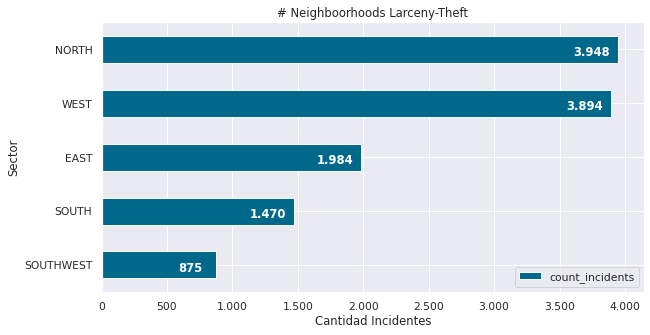

In [115]:
fig, ax = plt.subplots(figsize=(10,5), dpi=70)
ax.xaxis.set_major_formatter(FuncFormatter(formato_numerico))
by_category_pc2.plot.barh(ax=ax,color='#00688B',ylabel='Sector',xlabel='Cantidad Incidentes',rot=0,title='# Neighboorhoods Larceny-Theft')
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    # The height of the bar is the data value and can be used as the label
    label_text = "{:,}".format(int(width)).replace(',','~').replace('.',',').replace('~','.')
    label_x = x + width - 200
    label_y = y + ((height / 2)-0.05)
    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x,label_y,label_text,ha='center',va='center',color='w',fontsize=12,weight='bold')

### Para cualquiera de las ciudades, ¿Cómo varían los incidentes mes a mes en el conjunto de datos del verano de 2014?

In [146]:
# 4 Para cualquiera de las ciudades, ¿cómo varían los incidentes mes a mes en el conjunto de datos del verano de 2014?
#print('4. Para cualquiera de las ciudades, ¿cómo varían los incidentes mes a mes en el conjunto de datos del verano de 2014?')
dfmcpp_month2 = dfsea2014[dfsea2014['MCPP']!='UNKNOWN'].groupby(['MCPP','Month']).size().unstack().fillna(0).reset_index()
dfmcpp_month2.columns.values[0:4] =['MCPP','June','July','August']

dfmcpp_month2['All']=dfmcpp_month2['June']+dfmcpp_month2['July']+dfmcpp_month2['August']
dfmcpp_month2.index.name = 'Index'

dfmcpp_month3 = dfsea2014[dfsea2014['MCPP']!='UNKNOWN'].groupby(['MCPP','Month'])['Report Number1'].agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()
dfmcpp_month3 = dfmcpp_month3.astype({'Month':'string'})
dfmcpp_month3.loc[(dfmcpp_month3['Month']=='6'), 'Month'] = 'June'
dfmcpp_month3.loc[(dfmcpp_month3['Month']=='7'), 'Month'] = 'July'
dfmcpp_month3.loc[(dfmcpp_month3['Month']=='8'), 'Month'] = 'August'
#dfmcpp_month3.head(100)

dfmcpp_month2 = dfsea2014[dfsea2014['MCPP']!='UNKNOWN'].groupby(['MCPP','Month']).size().unstack().fillna(0).reset_index()
dfmcpp_month2.columns.values[0:4] =['MCPP','June','July','August']

In [147]:
dfmcpp_month2.head(100)

Month                              MCPP  June  July  August
0                       ALASKA JUNCTION   111   102      61
1                                  ALKI    58    61      53
2                         BALLARD NORTH   318   284     253
3                         BALLARD SOUTH   269   301     314
4                              BELLTOWN   291   383     265
5                            BITTERLAKE   217   220     200
6                       BRIGHTON/DUNLAP   102   187     163
7                          CAPITOL HILL   693   629     651
8              CENTRAL AREA/SQUIRE PARK   189   190     209
9      CHINATOWN/INTERNATIONAL DISTRICT   195   192     150
10              CLAREMONT/RAINIER VISTA    52    59      39
11                        COLUMBIA CITY    47    55      37
12                  COMMERCIAL DUWAMISH     5     9       4
13             COMMERCIAL HARBOR ISLAND     2     6       1
14                  DOWNTOWN COMMERCIAL   728   813     835
15                      EASTLAKE - EAST    16    23      22
16                      EASTLAKE - WEST   106    55      64
17                        FAUNTLEROY SW    49    32      35
18                           FIRST HILL   246   219     207
19                              FREMONT   233   156     161
20                              GENESEE    34    39      47
21                           GEORGETOWN    85    91     110
22                            GREENWOOD   289   216     176
23                           HIGH POINT    72    26      69
24                        HIGHLAND PARK    86   124      98
25                         HILLMAN CITY    28    45      32
26       JUDKINS PARK/NORTH BEACON HILL    81    85      76
27                             LAKECITY   321   298     250
28                 LAKEWOOD/SEWARD PARK    59    90      72
29                         MADISON PARK    37    35      30
30                       MADRONA/LESCHI   127   154     105
31                             MAGNOLIA   180   148     150
32                      MID BEACON HILL   117   104      76
33                          MILLER PARK    69    54      57
34                 MONTLAKE/PORTAGE BAY    68    98      89
35                               MORGAN    46    59      54
36                          MOUNT BAKER   140   148     101
37                            NEW HOLLY    55    58      54
38                        NORTH ADMIRAL    81    62      69
39                    NORTH BEACON HILL   187   151     152
40                       NORTH DELRIDGE    65    36      40
41                            NORTHGATE   585   588     511
42                        PHINNEY RIDGE    84    74      79
43                         PIGEON POINT     6     6       4
44                       PIONEER SQUARE   238   177     151
45                           QUEEN ANNE   468   435     470
46                        RAINIER BEACH   102   109     109
47                         RAINIER VIEW    99    91      42
48                    ROOSEVELT/RAVENNA   336   385     351
49       ROXHILL/WESTWOOD/ARBOR HEIGHTS   129   140     113
50                            SANDPOINT   175   162     195
51                          SLU/CASCADE   426   401     394
52                                 SODO   146   139      90
53                    SOUTH BEACON HILL    37    55      27
54                       SOUTH DELRIDGE    43    38      39
55                           SOUTH PARK    87   126     125
56                           UNIVERSITY   331   386     379
57                          WALLINGFORD   239   221     174

In [141]:
df = gpd.read_file('https://raw.githubusercontent.com/frmrv1/dscience_seattle_job/main/Seattle_MCPP.geojson')
#Find the center point
df['Center_point'] = df['geometry'].centroid
#Extract lat and lon from the centerpoint
df["lon"] = df.Center_point.map(lambda p: p.x).astype(str)
df["lat"] = df.Center_point.map(lambda p: p.y).astype(str)
del df['objectid']
del df['precinct']
del df['SHAPE_Length']
del df['SHAPE_Area']
del df['geometry']
dfmcpp_month4=dfmcpp_month3.merge(df, left_on='MCPP', right_on='neighborhood', how='left')

app = dash.Dash()
def fig_map(dfmcpp_month4):
    fig = px.scatter_mapbox(dfmcpp_month4, lat="lat", lon="lon",
                            height=600, width=900,
                            color="count_incidents", size="count_incidents", size_max=75, animation_frame='Month',
                            color_continuous_scale='reds',
                            
                            mapbox_style="carto-positron", zoom=10, hover_name="neighborhood",
                            center={"lat": 47.60621, "lon": -122.33207})
    fig.update_layout(
    title_x=0.5,
    title_y=0.95,
    title_text="¿Cómo varían los incidentes mes a mes en el conjunto de datos del verano de 2014?",
    margin={"l": 0, "r": 0, "b": 0, "t": 80}
    ,font_size=9
)
 
    return fig

app.layout = html.Div([

    html.Div([
        dcc.Graph(id='map_plot1', figure=fig_map(dfmcpp_month4))],
        style={'width': '75%', 'display': 'inline-block'}),

    html.Div(style={'width': '25%', 'display': 'inline-block'}, id='my-graph-container')
])

##calback
@callback(
    Output(component_id='my-graph-container', component_property='children'),
    Input(component_id='map_plot1', component_property='clickData'))
def update_graph(clickData):
    if clickData:
        mcpp = clickData['points'][0]['hovertext']
        dff = dfmcpp_month4[dfmcpp_month4['neighborhood'] == mcpp]
        print(dff.head())
        fig1 = px.line(dff, x='Month', y='count', title=mcpp)
        return dcc.Graph(figure=fig1)
    else:
        no_update
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

/tmp/ipykernel_1636/978173638.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




### Para cualquiera de las ciudades, ¿qué tipos de incidentes tienden a correlacionarse entre sí día a día?

In [144]:
# 5. Para cualquiera de las ciudades, ¿qué tipos de incidentes tienden a correlacionarse entre sí día a día?
dfmcpp_corr1 = dfsea2014.groupby(['SeaStat Category '])['Report Number1']\
.agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()
heatmap_pt = pd2.pivot_table(dfmcpp_corr1,values ='count_incidents', index=['SeaStat Category '])

In [145]:
heatmap_pt.head(100)

count_incidents
SeaStat Category                  
All Other Crime             8357.0
Property Crime             18520.0
Violent Crime               1361.0

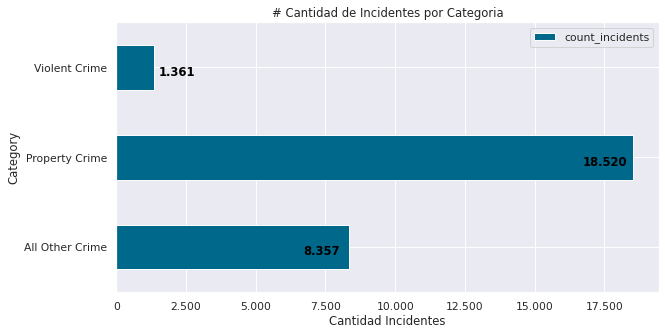

In [92]:
fig, ax = plt.subplots(figsize=(10,5), dpi=70)
ax.xaxis.set_major_formatter(FuncFormatter(formato_numerico))
heatmap_pt.plot.barh(ax=ax,color='#00688B',ylabel='Category',xlabel='Cantidad Incidentes',rot=0,title='# Cantidad de Incidentes por Categoria')
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    # The height of the bar is the data value and can be used as the label
    label_text = "{:,}".format(int(width)).replace(',','~').replace('.',',').replace('~','.')
    label_x = x + width - 1000
    if label_x < 5000:
        label_x = x + width + 800
    label_y = y + ((height / 2)-0.05)
    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x,label_y,label_text,ha='center',va='center',color='black',fontsize=12,weight='bold')

In [152]:
# 5. Para cualquiera de las ciudades, ¿qué tipos de incidentes tienden a correlacionarse entre sí día a día?
dfmcpp_corr1 = dfsea2014.groupby(['SeaStat Offense','date_start'])['Report Number1']\
.agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()
heatmap_pt = pd2.pivot_table(dfmcpp_corr1,values ='count_incidents', index=['SeaStat Offense'], columns='date_start')

In [153]:
heatmap_pt.head(100)

date_start                                     2014-06-01  2014-06-02  2014-06-03  2014-06-04  2014-06-05  2014-06-06  2014-06-07  2014-06-08  2014-06-09  2014-06-10  2014-06-11  2014-06-12  2014-06-13  2014-06-14  2014-06-15  2014-06-16  2014-06-17  2014-06-18  2014-06-19  2014-06-20  2014-06-21  2014-06-22  2014-06-23  2014-06-24  2014-06-25  2014-06-26  2014-06-27  2014-06-28  2014-06-29  2014-06-30  2014-07-01  2014-07-02  2014-07-03  2014-07-04  2014-07-05  2014-07-06  2014-07-07  2014-07-08  2014-07-09  2014-07-10  2014-07-11  2014-07-12  2014-07-13  2014-07-14  2014-07-15  2014-07-16  2014-07-17  2014-07-18  2014-07-19  2014-07-20  2014-07-21  2014-07-22  2014-07-23  2014-07-24  2014-07-25  2014-07-26  2014-07-27  2014-07-28  2014-07-29  2014-07-30  2014-07-31  2014-08-01  2014-08-02  2014-08-03  2014-08-04  2014-08-05  2014-08-06  2014-08-07  2014-08-08  2014-08-09  2014-08-10  2014-08-11  2014-08-12  2014-08-13  2014-08-14  2014-08-15  2014-08-16  2014-08-17  2014-08-18  \
SeaStat Offense                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
Aggravated Assault                                   12.0         4.0         3.0         8.0         4.0        13.0         2.0         5.0         5.0         4.0         2.0         5.0         9.0         6.0         4.0         2.0         2.0         NaN         4.0         9.0        12.0         8.0         8.0         4.0        15.0         6.0         9.0        17.0         6.0        11.0         6.0        10.0         NaN         2.0        13.0         8.0         6.0         8.0         7.0         7.0         4.0        17.0         6.0         2.0         8.0         2.0         3.0         5.0        20.0         6.0         4.0         NaN         6.0         7.0        16.0         9.0        15.0         4.0         7.0        16.0         7.0         1.0        13.0         8.0        14.0         9.0         6.0         2.0         NaN         4.0         8.0         5.0         1.0         7.0         7.0         2.0        10.0         2.0        10.0   
Assault Offenses                                     28.0        19.0        22.0        42.0        27.0        21.0        43.0        37.0        20.0        22.0        24.0        22.0        24.0        19.0        10.0        36.0         7.0        18.0        19.0        27.0        30.0        21.0        12.0        22.0        35.0        22.0        20.0        26.0        22.0        19.0        23.0        20.0        20.0        18.0        28.0        18.0        14.0        30.0        18.0        25.0        13.0        24.0        18.0        28.0        34.0        41.0        22.0        21.0        14.0        26.0        12.0        17.0        24.0        29.0        23.0        30.0        27.0        10.0        24.0        22.0        28.0        25.0        24.0        27.0        29.0        23.0        21.0        23.0        28.0        41.0        26.0        23.0        21.0        16.0        27.0        11.0        31.0        30.0        21.0   
Burglary    

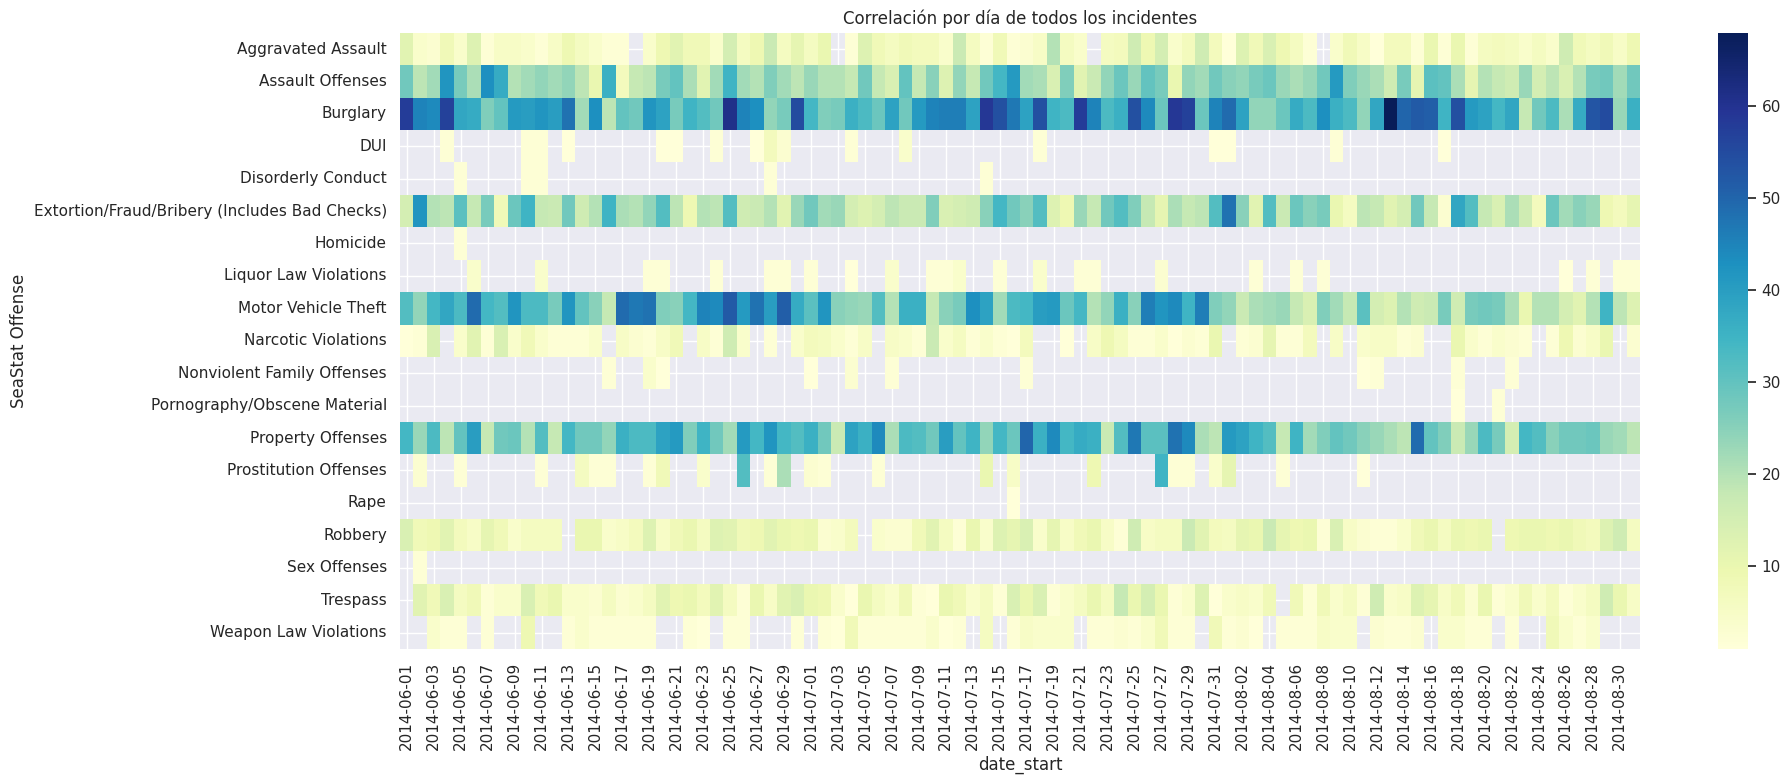

In [156]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set()
sns.heatmap(heatmap_pt, cmap='YlGnBu')
plt.xticks(rotation=90)
ax.set_title('Correlación por día de todos los incidentes')
plt.show()

In [154]:

# 5. Para cualquiera de las ciudades, ¿qué tipos de incidentes tienden a correlacionarse entre sí día a día?
dfmcpp_corr1 = dfsea2014[dfsea2014['SeaStat Offense']!='Larceny-Theft'].groupby(['SeaStat Offense','date_start'])['Report Number1']\
.agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()
heatmap_pt = pd2.pivot_table(dfmcpp_corr1,values ='count_incidents', index=['SeaStat Offense'], columns='date_start')
heatmap_pt.head(100)

date_start                                     2014-06-01  2014-06-02  2014-06-03  2014-06-04  2014-06-05  2014-06-06  2014-06-07  2014-06-08  2014-06-09  2014-06-10  2014-06-11  2014-06-12  2014-06-13  2014-06-14  2014-06-15  2014-06-16  2014-06-17  2014-06-18  2014-06-19  2014-06-20  2014-06-21  2014-06-22  2014-06-23  2014-06-24  2014-06-25  2014-06-26  2014-06-27  2014-06-28  2014-06-29  2014-06-30  2014-07-01  2014-07-02  2014-07-03  2014-07-04  2014-07-05  2014-07-06  2014-07-07  2014-07-08  2014-07-09  2014-07-10  2014-07-11  2014-07-12  2014-07-13  2014-07-14  2014-07-15  2014-07-16  2014-07-17  2014-07-18  2014-07-19  2014-07-20  2014-07-21  2014-07-22  2014-07-23  2014-07-24  2014-07-25  2014-07-26  2014-07-27  2014-07-28  2014-07-29  2014-07-30  2014-07-31  2014-08-01  2014-08-02  2014-08-03  2014-08-04  2014-08-05  2014-08-06  2014-08-07  2014-08-08  2014-08-09  2014-08-10  2014-08-11  2014-08-12  2014-08-13  2014-08-14  2014-08-15  2014-08-16  2014-08-17  2014-08-18  \
SeaStat Offense                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
Aggravated Assault                                   12.0         4.0         3.0         8.0         4.0        13.0         2.0         5.0         5.0         4.0         2.0         5.0         9.0         6.0         4.0         2.0         2.0         NaN         4.0         9.0        12.0         8.0         8.0         4.0        15.0         6.0         9.0        17.0         6.0        11.0         6.0        10.0         NaN         2.0        13.0         8.0         6.0         8.0         7.0         7.0         4.0        17.0         6.0         2.0         8.0         2.0         3.0         5.0        20.0         6.0         4.0         NaN         6.0         7.0        16.0         9.0        15.0         4.0         7.0        16.0         7.0         1.0        13.0         8.0        14.0         9.0         6.0         2.0         NaN         4.0         8.0         5.0         1.0         7.0         7.0         2.0        10.0         2.0        10.0   
Assault Offenses                                     28.0        19.0        22.0        42.0        27.0        21.0        43.0        37.0        20.0        22.0        24.0        22.0        24.0        19.0        10.0        36.0         7.0        18.0        19.0        27.0        30.0        21.0        12.0        22.0        35.0        22.0        20.0        26.0        22.0        19.0        23.0        20.0        20.0        18.0        28.0        18.0        14.0        30.0        18.0        25.0        13.0        24.0        18.0        28.0        34.0        41.0        22.0        21.0        14.0        26.0        12.0        17.0        24.0        29.0        23.0        30.0        27.0        10.0        24.0        22.0        28.0        25.0        24.0        27.0        29.0        23.0        21.0        23.0        28.0        41.0        26.0        23.0        21.0        16.0        27.0        11.0        31.0        30.0        21.0   
Burglary    

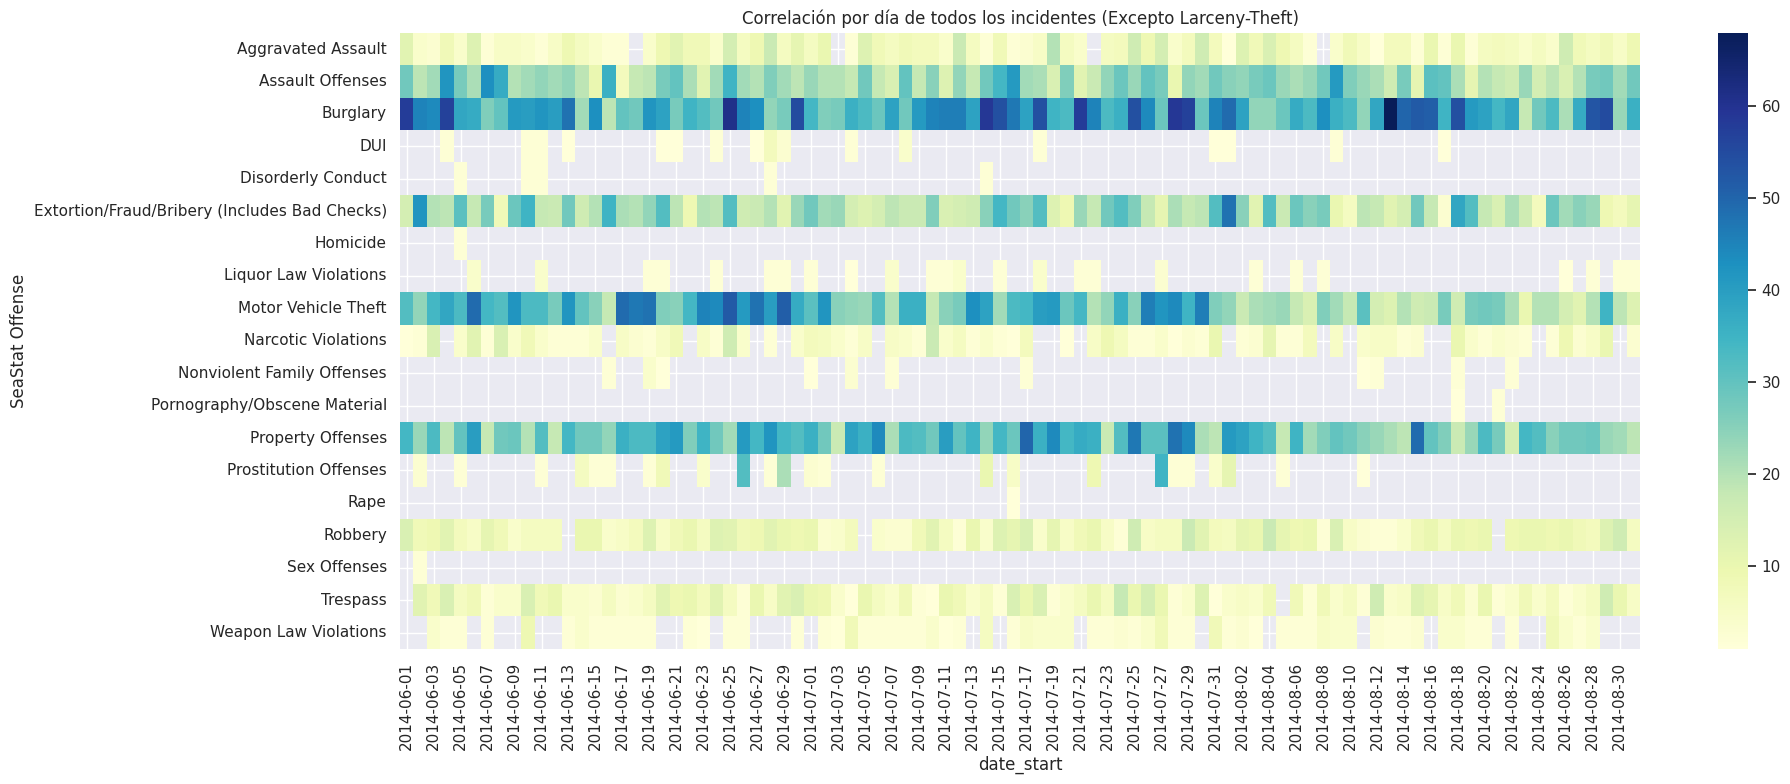

In [157]:
# 5. Para cualquiera de las ciudades, ¿qué tipos de incidentes tienden a correlacionarse entre sí día a día?
dfmcpp_corr1 = dfsea2014[dfsea2014['SeaStat Offense']!='Larceny-Theft'].groupby(['SeaStat Offense','date_start'])['Report Number1']\
.agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()
heatmap_pt = pd2.pivot_table(dfmcpp_corr1,values ='count_incidents', index=['SeaStat Offense'], columns='date_start')
# headmap_pt
fig, ax = plt.subplots(figsize=(20,8))
sns.set()
sns.heatmap(heatmap_pt, cmap='YlGnBu')
ax.set_title('Correlación por día de todos los incidentes (Excepto Larceny-Theft)')
plt.xticks(rotation=90)
plt.show()

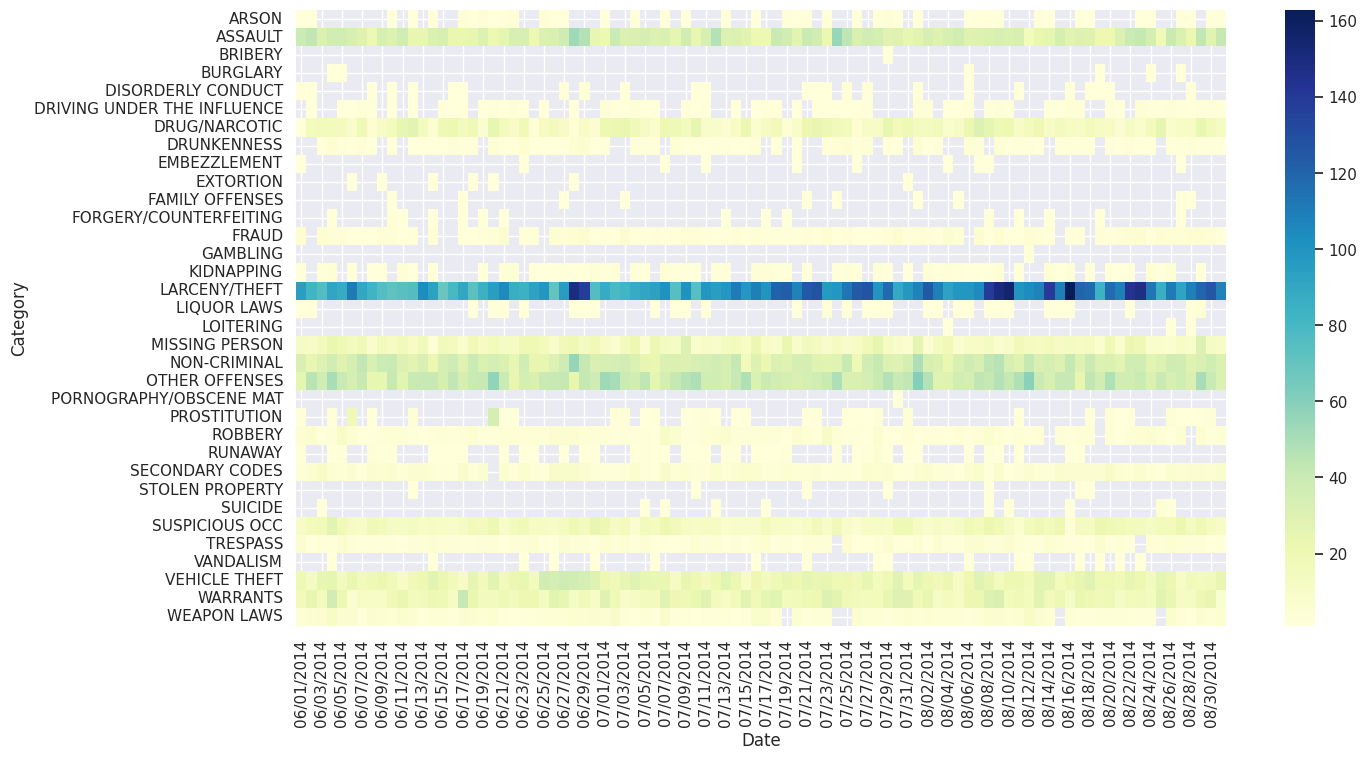

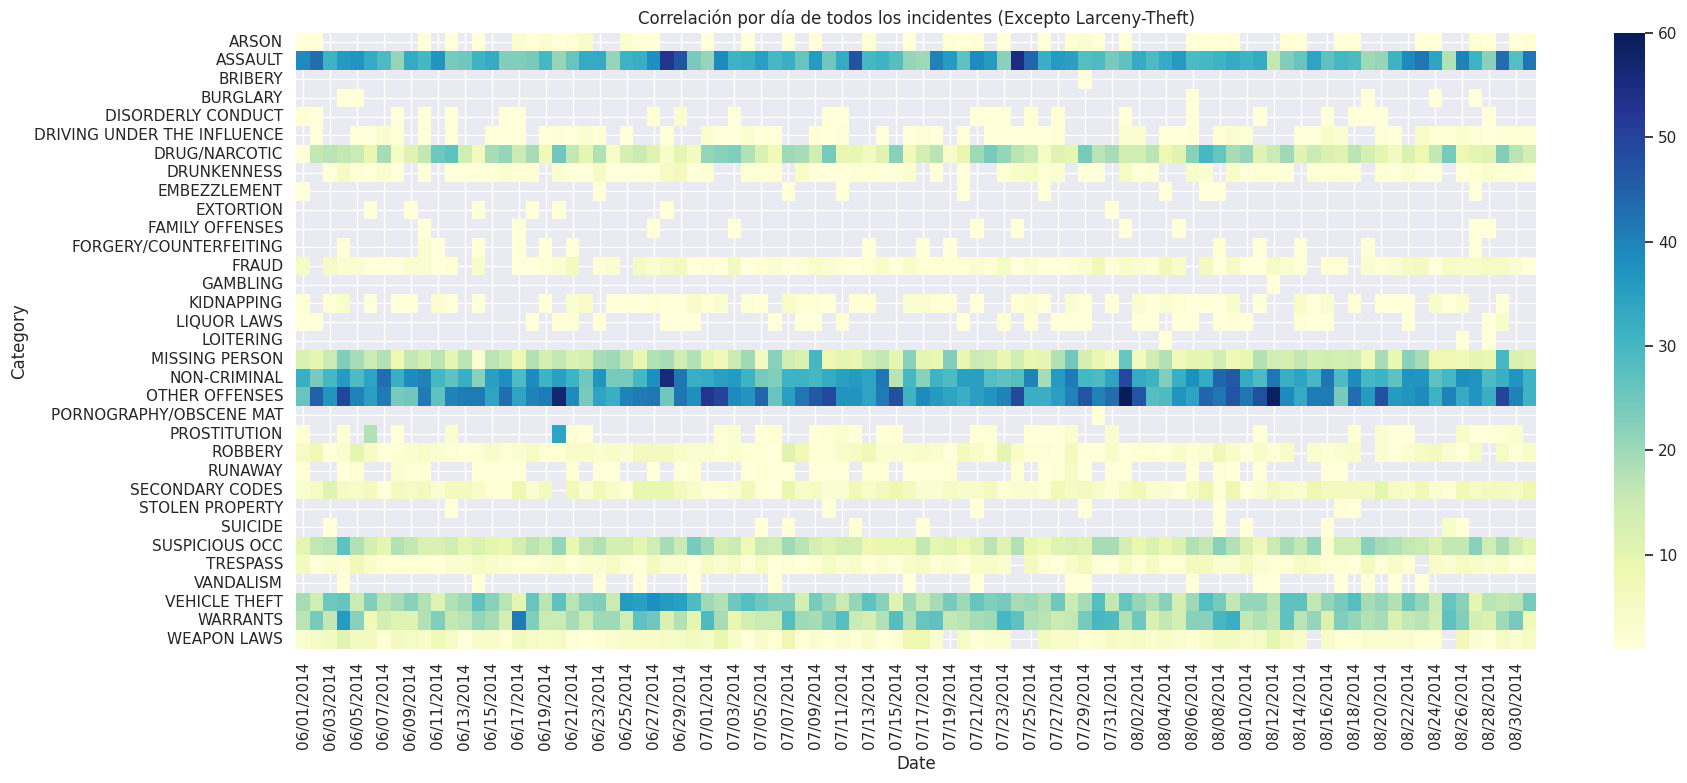

In [102]:
# 6. Avanzado ¿Qué podemos inferir en términos generales sobre las diferencias en los patrones delictivos entre Seattle y San Francisco?

# ¿Una ciudad tiende a tener más criminalidad que la otra, per cápita? 
# ¿Cambian materialmente las frecuencias relativas de los tipos de incidentes entre las dos ciudades? 
# (NOTA: Los dos conjuntos de datos no tienen el mismo esquema, por lo que las comparaciones requerirán algo de trabajo y algunas suposiciones. 
#  Esto requerirá trabajo adicional, ¡pero estará trabajando a la vanguardia de lo que se sabe!)


dfsf20142 = pd1.read_csv('sanfrancisco_incidents_summer_2014.csv') 

dfmcpp_corr1 = dfsf20142.groupby(['Category','Date'])['IncidntNum']\
.agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()
heatmap_pt = pd2.pivot_table(dfmcpp_corr1,values ='count_incidents', index=['Category'], columns='Date')

 

# # headmap_pt
fig, ax = plt.subplots(figsize=(15,8))
# fig, ax = plt.subplots()
sns.set()
sns.heatmap(heatmap_pt, cmap='YlGnBu')
plt.xticks(rotation=90)
plt.show()


# 5. Para cualquiera de las ciudades, ¿qué tipos de incidentes tienden a correlacionarse entre sí día a día?
#dfmcpp_corr1 = dfsea2014[dfsea2014['SeaStat Offense']!='Larceny-Theft'].groupby(['SeaStat Offense','date_start'])['Report Number1']\
#.agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()
#heatmap_pt = pd2.pivot_table(dfmcpp_corr1,values ='count_incidents', index=['SeaStat Offense'], columns='date_start')
 
dfmcpp_corr1 = dfsf20142[dfsf20142['Category']!='LARCENY/THEFT'].groupby(['Category','Date'])['IncidntNum']\
.agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()
heatmap_pt = pd2.pivot_table(dfmcpp_corr1,values ='count_incidents', index=['Category'], columns='Date')

# headmap_pt
fig, ax = plt.subplots(figsize=(20,8))
sns.set()
sns.heatmap(heatmap_pt, cmap='YlGnBu')
ax.set_title('Correlación por día de todos los incidentes (Excepto Larceny-Theft)')
plt.xticks(rotation=90)
plt.show()



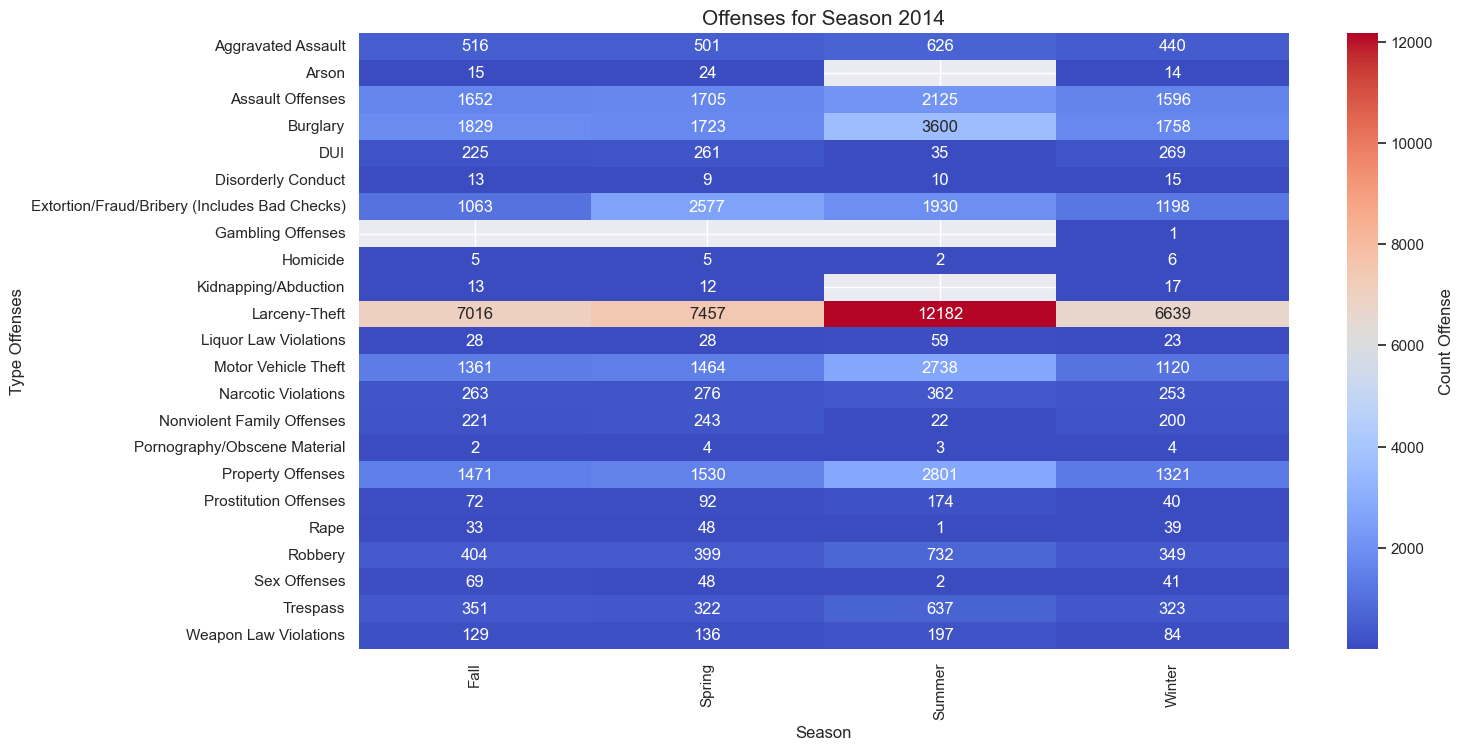

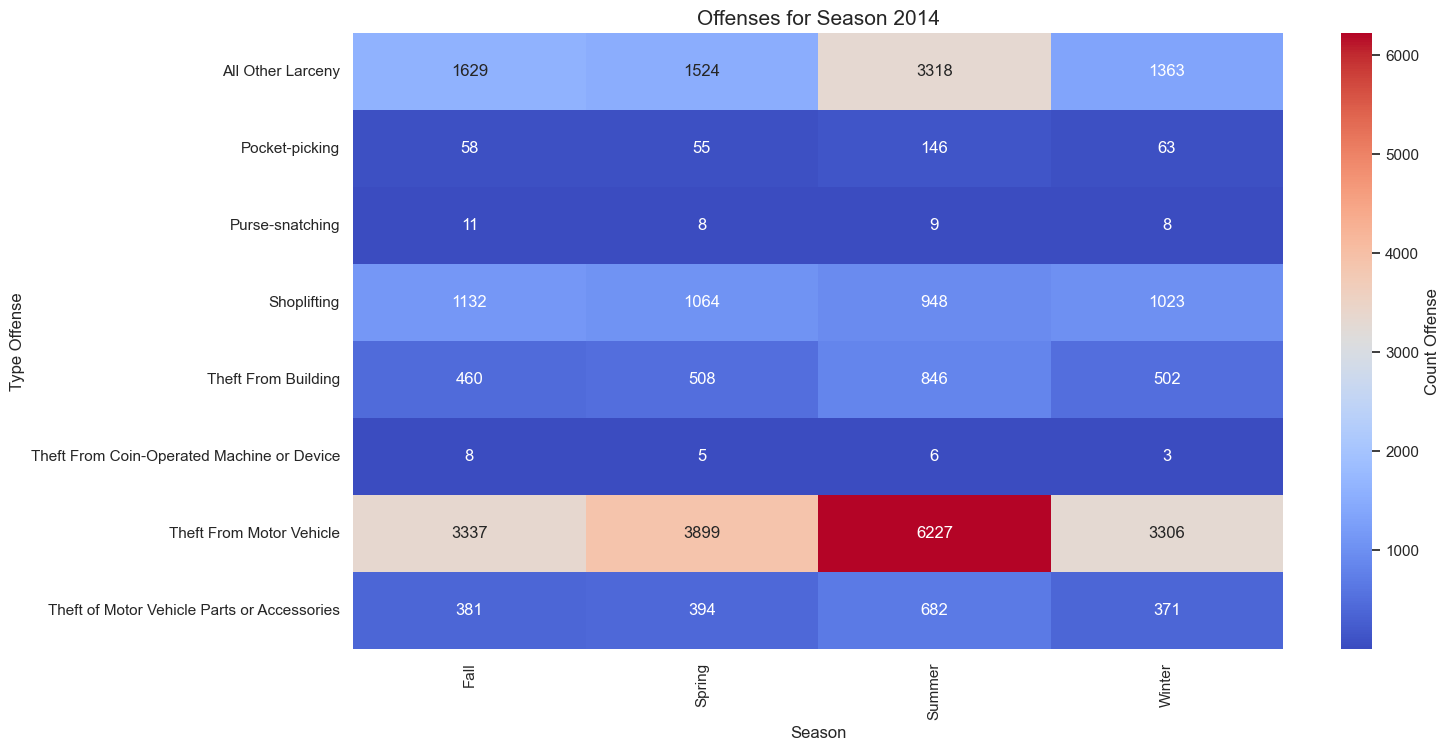

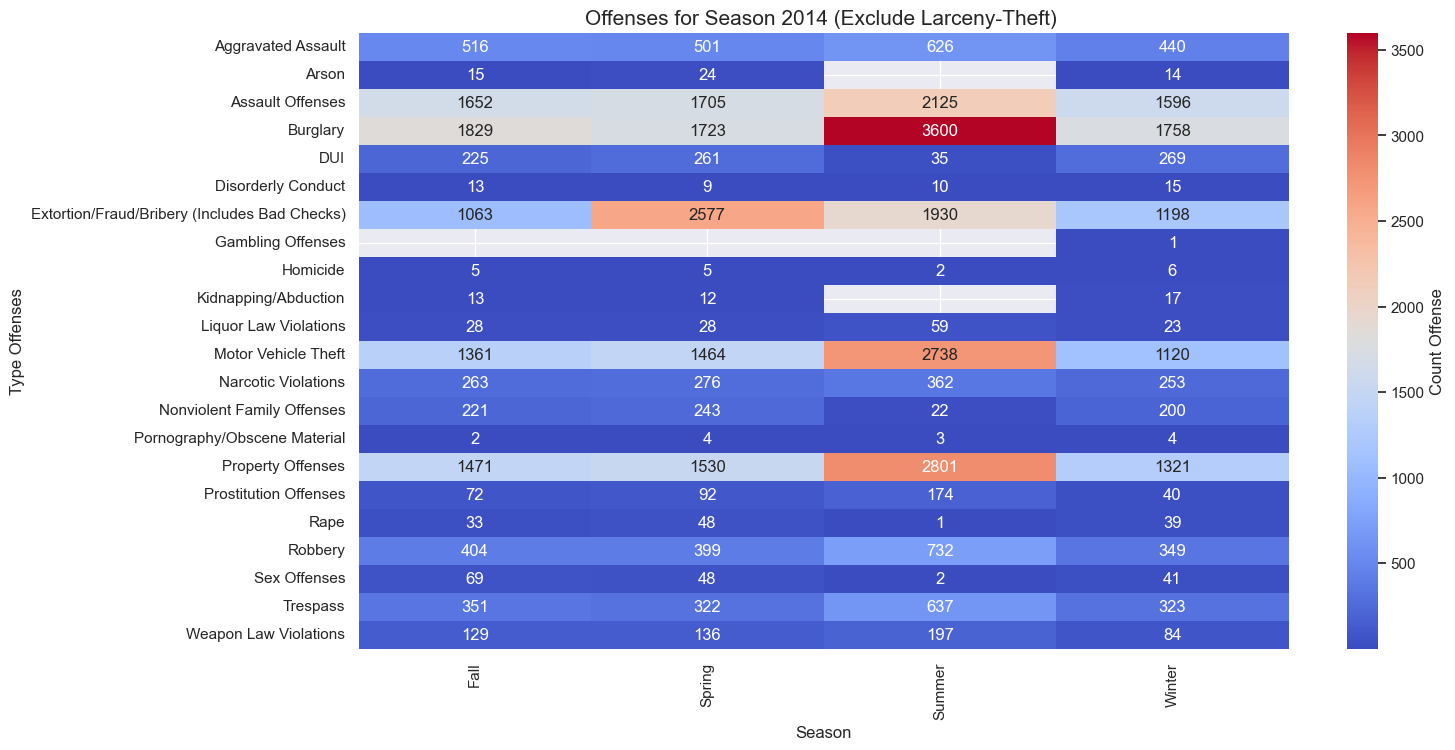

In [25]:
# 7 Avanzado Para cualquiera de las ciudades, ¿ciertos delitos se correlacionan con factores ambientales como la temperatura? 
# (Para responder a este tipo de preguntas, deberá identificar y utilizar fuentes de datos externas).

###########

dfsea2014_all_notsummer = dfsea2014_all[(dfsea2014_all['Year of Offense Start DateTime']==2014) & \
     (~dfsea2014_all['Month of Offense Start DateTime'].isin(["June","July","August"]))].groupby \
     (['SeaStat Offense','Month of Offense Start DateTime'])['Report Number'].agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()

dfsea2014_summer = dfsea2014[(dfsea2014['Year of Offense Start DateTime']==2014)].groupby \
    (['SeaStat Offense','Month of Offense Start DateTime'])['Report Number'].agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()

dfsea2014_tem_all= pd2.concat([dfsea2014_all_notsummer, dfsea2014_summer], axis=0)
dfsea2014_tem_all.loc[dfsea2014_tem_all['Month of Offense Start DateTime'].isin(['September','October','November']), 'Season'] = 'Fall'
dfsea2014_tem_all.loc[dfsea2014_tem_all['Month of Offense Start DateTime'].isin(['December','January','February']), 'Season'] = 'Winter'
dfsea2014_tem_all.loc[dfsea2014_tem_all['Month of Offense Start DateTime'].isin(['March','April','May']), 'Season'] = 'Spring'
dfsea2014_tem_all.loc[dfsea2014_tem_all['Month of Offense Start DateTime'].isin(['June','July','August']), 'Season'] = 'Summer'

dfsea2014_tem_all = dfsea2014_tem_all.groupby(['SeaStat Offense','Season'])['count_incidents']\
.agg({"sum"}).rename(columns={"sum": "sum_incidents"}).reset_index()

heatmap_pt = pd2.pivot_table(dfsea2014_tem_all,values ='sum_incidents', index=['SeaStat Offense'], columns='Season')
fig, ax = plt.subplots(figsize=(15,8))
sns.set()
hmap=sns.heatmap(heatmap_pt, cmap='coolwarm',annot=True,fmt='g',cbar_kws={'label': 'Count Offense'})
hmap.set_xlabel('Season', fontsize=12)
hmap.set_ylabel('Type Offenses', fontsize=12)
hmap.set_title('Offenses for Season 2014',size=15)
plt.xticks(rotation=90)
plt.show()


###########

###########
dfsea2014_all_notsummer_Larceny_Theft = dfsea2014_all[(dfsea2014_all['SeaStat Offense']=='Larceny-Theft') & \
    (dfsea2014_all['Year of Offense Start DateTime']==2014) & \
    (~dfsea2014_all['Month of Offense Start DateTime'].isin(["June","July","August"]))].groupby \
(['Offense','Month of Offense Start DateTime'])['Report Number'].agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()

dfsea2014_summer_Larceny_Theft = dfsea2014[(dfsea2014['SeaStat Offense']=='Larceny-Theft') & \
(dfsea2014['Year of Offense Start DateTime']==2014)].groupby \
(['Offense','Month of Offense Start DateTime'])['Report Number'].agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()

dfsea2014_tem_Larceny_Theft= pd2.concat([dfsea2014_all_notsummer_Larceny_Theft, dfsea2014_summer_Larceny_Theft], axis=0)
dfsea2014_tem_Larceny_Theft.loc[dfsea2014_tem_Larceny_Theft['Month of Offense Start DateTime'].isin(['September','October','November']), 'Season'] = 'Fall'
dfsea2014_tem_Larceny_Theft.loc[dfsea2014_tem_Larceny_Theft['Month of Offense Start DateTime'].isin(['December','January','February']), 'Season'] = 'Winter'
dfsea2014_tem_Larceny_Theft.loc[dfsea2014_tem_Larceny_Theft['Month of Offense Start DateTime'].isin(['March','April','May']), 'Season'] = 'Spring'
dfsea2014_tem_Larceny_Theft.loc[dfsea2014_tem_Larceny_Theft['Month of Offense Start DateTime'].isin(['June','July','August']), 'Season'] = 'Summer'

dfsea2014_tem_Larceny_Theft = dfsea2014_tem_Larceny_Theft.groupby(['Offense','Season'])['count_incidents']\
.agg({"sum"}).rename(columns={"sum": "sum_incidents"}).reset_index()

heatmap_pt = pd2.pivot_table(dfsea2014_tem_Larceny_Theft,values ='sum_incidents', index=['Offense'], columns='Season')
fig, ax = plt.subplots(figsize=(15,8))
sns.set()
hmap=sns.heatmap(heatmap_pt, cmap='coolwarm',annot=True,fmt='g',cbar_kws={'label': 'Count Offense'})
hmap.set_xlabel('Season', fontsize=12)
hmap.set_ylabel('Type Offense', fontsize=12)
hmap.set_title('Offenses for Season 2014',size=15)
plt.xticks(rotation=90)
plt.show()

###########


###########
dfsea2014_all_notsummer_NotLarceny_Theft = dfsea2014_all[(dfsea2014_all['SeaStat Offense']!='Larceny-Theft') & \
    (dfsea2014_all['Year of Offense Start DateTime']==2014) & \
    (~dfsea2014_all['Month of Offense Start DateTime'].isin(["June","July","August"]))].groupby \
(['SeaStat Offense','Month of Offense Start DateTime'])['Report Number'].agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()

dfsea2014_summer_NotLarceny_Theft = dfsea2014[(dfsea2014['SeaStat Offense']!='Larceny-Theft') & \
(dfsea2014['Year of Offense Start DateTime']==2014)].groupby \
(['SeaStat Offense','Month of Offense Start DateTime'])['Report Number'].agg({"count"}).rename(columns={"count": "count_incidents"}).reset_index()

dfsea2014_tem_NotLarceny_Theft= pd2.concat([dfsea2014_all_notsummer_NotLarceny_Theft, dfsea2014_summer_NotLarceny_Theft], axis=0)
dfsea2014_tem_NotLarceny_Theft.loc[dfsea2014_tem_NotLarceny_Theft['Month of Offense Start DateTime'].isin(['September','October','November']), 'Season'] = 'Fall'
dfsea2014_tem_NotLarceny_Theft.loc[dfsea2014_tem_NotLarceny_Theft['Month of Offense Start DateTime'].isin(['December','January','February']), 'Season'] = 'Winter'
dfsea2014_tem_NotLarceny_Theft.loc[dfsea2014_tem_NotLarceny_Theft['Month of Offense Start DateTime'].isin(['March','April','May']), 'Season'] = 'Spring'
dfsea2014_tem_NotLarceny_Theft.loc[dfsea2014_tem_NotLarceny_Theft['Month of Offense Start DateTime'].isin(['June','July','August']), 'Season'] = 'Summer'

dfsea2014_tem_NotLarceny_Theft = dfsea2014_tem_NotLarceny_Theft.groupby(['SeaStat Offense','Season'])['count_incidents']\
.agg({"sum"}).rename(columns={"sum": "sum_incidents"}).reset_index()

heatmap_pt = pd2.pivot_table(dfsea2014_tem_NotLarceny_Theft,values ='sum_incidents', index=['SeaStat Offense'], columns='Season')
fig, ax = plt.subplots(figsize=(15,8))
sns.set()
hmap=sns.heatmap(heatmap_pt, cmap='coolwarm',annot=True,fmt='g',cbar_kws={'label': 'Count Offense'})
hmap.set_xlabel('Season', fontsize=12)
hmap.set_ylabel('Type Offenses', fontsize=12)
hmap.set_title('Offenses for Season 2014 (Exclude Larceny-Theft) ',size=15)



plt.xticks(rotation=90)
plt.show()
###########